<a href="https://colab.research.google.com/github/JinnyHan/2022F-Ajou-F086/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [3]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('/content/drive/MyDrive/kmong/machine_assignment/airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=121)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9,random_state=121)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

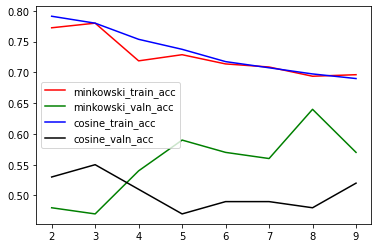

prediction accuracy: 0.63


In [10]:
### 문제 1 ###
### 코드 작성 ###

train_score_m=[]
val_score_m=[]
for i in range(2,10):
  knn_m = KNeighborsClassifier(metric='minkowski',n_neighbors = i)
  knn_m.fit(X_train,y_train)
  train_score_m.append(knn_m.score(X_train,y_train))
  val_score_m.append(knn_m.score(X_val,y_val))

train_score_c=[]
val_score_c=[]
for i in range(2,10):
  knn_c = KNeighborsClassifier(metric='cosine',n_neighbors = i)
  knn_c.fit(X_train,y_train)
  train_score_c.append(knn_c.score(X_train,y_train))
  val_score_c.append(knn_c.score(X_val,y_val))

a = range(2,10)

plt.plot(a, train_score_m, 'r', label='minkowski_train_acc') 
plt.plot(a, val_score_m, 'g', label='minkowski_valn_acc') 
plt.plot(a, train_score_c, 'b', label='cosine_train_acc') 
plt.plot(a, val_score_c, 'k', label='cosine_valn_acc') 
plt.legend()
plt.show()

knn_c = KNeighborsClassifier(metric='cosine',n_neighbors = 2)
knn_c.fit(X_train,y_train)
y_pred = knn_c.predict(X_test)
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == y_test)))

**설명 작성**  
- 최적의 파라미터:k=2,거리 척도=cosine
- 설명:KNN의 파라미터로 K의 값과 거리척도를 다르게 설정하여 각각 정확도를 비교한다. K 파라미터값은 2~10, 거리 척도는 cosine,minkowski를 이용한다.
반복문을 이용하여 모든 경우의 수에 대해 학습을 진행시키고 정확도를 비교한다. 그 결과 K=2, 거리 척도는 cosine을 이용할 때에 가장 높은 정확도를 나타내는것을 알 수 있다.

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [11]:
from sklearn.ensemble import RandomForestClassifier

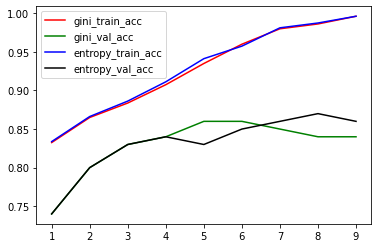

prediction accuracy: 0.91


In [12]:
### 문제 2 ###
### 코드 작성 ###
train_score_rf=[]
val_score_rf=[]
for i in range(1,10):
  rf = RandomForestClassifier(random_state=0,max_depth=i)
  rf.fit(X_train,y_train)
  train_score_rf.append(rf.score(X_train,y_train))
  val_score_rf.append(rf.score(X_val,y_val))

train_score_rf_e=[]
val_score_rf_e=[]
for i in range(1,10):
  rf_e = RandomForestClassifier(random_state=0,criterion = 'entropy',max_depth=i)
  rf_e.fit(X_train,y_train)
  train_score_rf_e.append(rf_e.score(X_train,y_train))
  val_score_rf_e.append(rf_e.score(X_val,y_val))

a = range(1,10)

plt.plot(a, train_score_rf, 'r', label='gini_train_acc') 
plt.plot(a, val_score_rf, 'g', label='gini_val_acc') 
plt.plot(a, train_score_rf_e, 'b', label='entropy_train_acc') 
plt.plot(a, val_score_rf_e, 'k', label='entropy_val_acc') 
plt.legend()
plt.show()

rf_e = RandomForestClassifier(random_state=0,max_depth=10,criterion = 'entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == y_test)))


**설명 작성**  
- 최적의 파라미터:max_depth = 10, criterion=entropy
- 설명:Random Forest의 파라미터로 max_depth의 값과 criterion을 다르게 설정하여 각각 정확도를 비교한다. max_depth 값은 1~10, criterion은 default,entropy를 이용한다.
반복문을 이용하여 모든 경우의 수에 대해 학습을 진행시키고 정확도를 비교한다. 그 결과 max_depth=10, criterion은 entropy를 이용할 때에 가장 높은 정확도를 나타내는것을 알 수 있다.


---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [13]:
x=X_train.append(X_val)
y=y_train.append(y_val)
print(x.shape)
print(y.shape)

(900, 24)
(900,)


In [ ]:
### 문제 3-1 ###
### 코드 작성 ###
from sklearn.model_selection import KFold,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

score_mean = []
score_f1 = []
score_f2 = []
score_f3 = []
score_f4 = []
score_f5 = []

kfold = KFold(n_splits=5, shuffle = True, random_state=0)
for i in range(1,30,10):
  model = SVC(kernel='linear', C=i, random_state=1)


  scores = cross_val_score(model, x, y ,cv=kfold)
  score_f1.append(scores[0])
  score_f2.append(scores[1])
  score_f3.append(scores[2])
  score_f4.append(scores[3])
  score_f5.append(scores[4])
  score_mean.append(np.mean(scores))




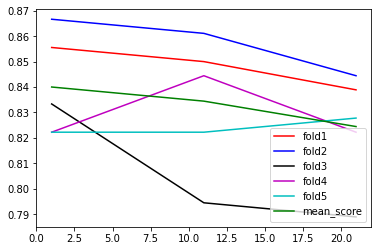

In [ ]:
a = range(1,30,10)

plt.plot(a, score_f1, 'r', label='fold1') 
plt.plot(a, score_f2, 'b', label='fold2') 
plt.plot(a, score_f3, 'k', label='fold3') 
plt.plot(a, score_f4, 'm', label='fold4') 
plt.plot(a, score_f5, 'c', label='fold5') 
plt.plot(a, score_mean, 'g', label='mean_score') 
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1, random_state=1)
model.fit(x,y)
y_pred = model.predict(X_test)
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == y_test)))

prediction accuracy: 0.82


**설명 작성**  
- 최적의 파라미터:C = 1
- 설명:교차검증을 진행하기 위해 train data와 validation data를 합쳐준다. 그 후 각각의 accuracy score를 저장하기 위한 fold별 list를 생성해준다. K-fold 교차검증을 위한 함수를 선언해 주고 SVC의 파라미터 C의 값별로 반복하여 교차검증을 진행해 준다. 저장된 accuracy score를 이용하여 그래프를 plot한다.
확인 결과 C = 1일때 정확도가 가장 높은것을 알 수 있다.

In [ ]:
### 문제 3-2 ###
### 코드 작성 ###
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import absolute

loocv = LeaveOneOut()
score_mean_lo = []
for i in range(1,30,10):
  modle = SVC(kernel='linear', C=i, random_state=1)

  scores = cross_val_score(model, x, y,cv=loocv)
  score_mean_lo.append(np.mean(scores))

a = range(1,30,10)
plt.plot(a, score_mean, 'g', label='mean_score') 
plt.legend()
plt.show()

In [ ]:
model = SVC(kernel='linear', C=1, random_state=1)
model.fit(x,y)
y_pred = model.predict(X_test)
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == y_test)))

**설명 작성**  
- 최적의 파라미터:
- 설명:교차검증의 방법으로 leave-one-out 방법을 이용한다. SVC의 파라미터 C의 값별로 반복하여 교차검증을 진행해 준다. 각각의 파라미터에 대하여 평균 accuracy 값을 list에 저장한다. 저장된 accuracy score를 이용하여 그래프를 plot한다.
확인 결과 C = 1일때 정확도가 가장 높은것을 알 수 있다.

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

In [ ]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [ ]:
print(df.head())

In [ ]:
print(df.shape) #(20640, 9)
print(df.describe())

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """

####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

In [ ]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ##################




        ##############################################
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
### 문제 4-3 ###
### 코드 작성 ###

In [ ]:
### 문제 4-3 ###
### 그래프 작성 ###

- Rridge regression 모델 최적의 alpha 값:
- Lasso regression 모델 최적의 alpha 값:

In [ ]:
# 최종 결과 출력